# Decision Trees for regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
bluebikes_idle_time = pd.read_csv("bluebikes_idle_time_v3.csv")
bluebikes_idle_time.head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6,0 days 00:13:16
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6,0 days 00:16:17
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6,0 days 00:21:22
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6,0 days 00:01:59


In [3]:
# convert time and date into correct format
bluebikes_idle_time["start_time"] = pd.to_datetime(bluebikes_idle_time["start_time"])
bluebikes_idle_time["end_time"] = pd.to_datetime(bluebikes_idle_time["end_time"])
bluebikes_idle_time["idle_time"] = pd.to_timedelta(bluebikes_idle_time["idle_time"])

bluebikes_idle_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081461 entries, 0 to 3081460
Data columns (total 7 columns):
 #   Column            Dtype          
---  ------            -----          
 0   start_time        datetime64[ns] 
 1   end_time          datetime64[ns] 
 2   start_station_id  int64          
 3   end_station_id    int64          
 4   bike_id           int64          
 5   weekday           int64          
 6   idle_time         timedelta64[ns]
dtypes: datetime64[ns](2), int64(4), timedelta64[ns](1)
memory usage: 164.6 MB


In [4]:
weather = pd.read_csv("boston_weather_cleaned.csv")
weather.head(5)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.00,1.0
1,Boston,2017-01-01 01:54:00,5.0,11,Light Rain,1012.49,20.0,0.00,1.0
2,Boston,2017-01-01 02:54:00,5.0,11,Light Rain,1011.81,24.0,0.51,1.0
3,Boston,2017-01-01 03:33:00,5.0,11,Light Rain / Windy,1011.47,39.0,0.51,-1.0
4,Boston,2017-01-01 03:54:00,4.0,11,Light Rain,1011.47,30.0,0.51,-1.0


In [5]:
# convert time and date into correct format
weather["timestamp"] = pd.to_datetime(weather["timestamp"])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21082 entries, 0 to 21081
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     21082 non-null  object        
 1   timestamp                21082 non-null  datetime64[ns]
 2   temperature              21082 non-null  float64       
 3   cloud_cover              21082 non-null  int64         
 4   cloud_cover_description  21082 non-null  object        
 5   pressure                 21082 non-null  float64       
 6   windspeed                21082 non-null  float64       
 7   precipitation            21082 non-null  float64       
 8   felt_temperature         21082 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
merged_weather_idle_time_station = pd.merge_asof(bluebikes_idle_time, weather, left_on="start_time", right_on="timestamp")
merged_weather_idle_time_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081461 entries, 0 to 3081460
Data columns (total 16 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   start_time               datetime64[ns] 
 1   end_time                 datetime64[ns] 
 2   start_station_id         int64          
 3   end_station_id           int64          
 4   bike_id                  int64          
 5   weekday                  int64          
 6   idle_time                timedelta64[ns]
 7   city                     object         
 8   timestamp                datetime64[ns] 
 9   temperature              float64        
 10  cloud_cover              float64        
 11  cloud_cover_description  object         
 12  pressure                 float64        
 13  windspeed                float64        
 14  precipitation            float64        
 15  felt_temperature         float64        
dtypes: datetime64[ns](3), float64(6), int64(4), object(2),

In [7]:
merged_weather_idle_time_station.dropna(inplace=True)

In [8]:
merged_weather_idle_time_station.head(10)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
13,2017-01-01 01:03:11,2017-01-01 01:06:27,27,56,375,6,0 days 01:03:11,Boston,2017-01-01 00:54:00,4.0,26.0,Cloudy,1013.50,13.0,0.0,1.0
14,2017-01-01 01:05:20,2017-01-01 01:09:39,80,178,1094,6,0 days 01:05:20,Boston,2017-01-01 00:54:00,4.0,26.0,Cloudy,1013.50,13.0,0.0,1.0
15,2017-01-01 01:07:09,2017-01-01 01:10:23,22,43,740,6,0 days 01:07:09,Boston,2017-01-01 00:54:00,4.0,26.0,Cloudy,1013.50,13.0,0.0,1.0
16,2017-01-01 01:19:01,2017-01-01 01:41:54,39,41,719,6,0 days 01:19:01,Boston,2017-01-01 00:54:00,4.0,26.0,Cloudy,1013.50,13.0,0.0,1.0
17,2017-01-01 01:22:19,2017-01-01 01:25:57,178,67,972,6,0 days 00:12:40,Boston,2017-01-01 00:54:00,4.0,26.0,Cloudy,1013.50,13.0,0.0,1.0
18,2017-01-01 01:32:12,2017-01-01 01:40:53,39,16,106,6,0 days 01:32:12,Boston,2017-01-01 00:54:00,4.0,26.0,Cloudy,1013.50,13.0,0.0,1.0
19,2017-01-01 01:33:20,2017-01-01 01:41:04,39,16,1487,6,0 days 01:33:20,Boston,2017-01-01 00:54:00,4.0,26.0,Cloudy,1013.50,13.0,0.0,1.0
20,2017-01-01 02:24:05,2017-01-01 02:40:28,42,169,327,6,0 days 02:24:05,Boston,2017-01-01 01:54:00,5.0,11.0,Light Rain,1012.49,20.0,0.0,1.0
21,2017-01-01 02:27:49,2017-01-01 02:36:51,4,46,1615,6,0 days 02:27:49,Boston,2017-01-01 01:54:00,5.0,11.0,Light Rain,1012.49,20.0,0.0,1.0
22,2017-01-01 02:39:02,2017-01-01 02:43:32,115,145,1215,6,0 days 02:39:02,Boston,2017-01-01 01:54:00,5.0,11.0,Light Rain,1012.49,20.0,0.0,1.0


In [9]:
bluebikes_station_location_feature = pd.read_csv("bluebikes_station_location_feature.csv")
bluebikes_station_location_feature.head(5)

,station_id_x,station_density,station_id_y,city_center_distance,boston_university_distance,fenway_park_distance,harvard_university_distance,mit_distance,boston_common_distance,boston_public_garden_distance,...,north_station_distance,back_bay_station_distance,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time,idle_time_hours
0,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6,0 days 00:06:58,0.116111
1,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 00:42:04,2017-01-01 00:46:25,67,179,1102,6,0 days 00:42:04,0.701111
2,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 03:00:00,2017-01-01 03:03:45,67,178,972,6,0 days 01:34:03,1.567500
3,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 04:03:37,2017-01-01 04:24:27,67,67,532,6,0 days 02:37:40,2.627778
4,67,0.954927,67,2.83579,1.312488,1.311493,2.196322,0.234932,2.246784,1.861094,...,2.7602,1.904668,2017-01-01 11:10:04,2017-01-01 11:31:10,67,74,532,6,0 days 00:12:15,0.204167


In [10]:
bluebikes_station_location_feature.columns

Index(['station_id_x', 'station_density', 'station_id_y',
       'city_center_distance', 'boston_university_distance',
       'fenway_park_distance', 'harvard_university_distance', 'mit_distance',
       'boston_common_distance', 'boston_public_garden_distance',
       'newbury_street_distance', 'south_station_distance',
       'north_station_distance', 'back_bay_station_distance', 'start_time',
       'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'weekday',
       'idle_time', 'idle_time_hours'],
      dtype='object')

In [11]:
# convert time and date into correct format
bluebikes_station_location_feature["start_time"] = pd.to_datetime(bluebikes_station_location_feature["start_time"])
bluebikes_station_location_feature["end_time"] = pd.to_datetime(bluebikes_station_location_feature["end_time"])
bluebikes_station_location_feature["idle_time"] = pd.to_timedelta(bluebikes_station_location_feature["idle_time"])

bluebikes_station_location_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915398 entries, 0 to 2915397
Data columns (total 22 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   station_id_x                   int64          
 1   station_density                float64        
 2   station_id_y                   int64          
 3   city_center_distance           float64        
 4   boston_university_distance     float64        
 5   fenway_park_distance           float64        
 6   harvard_university_distance    float64        
 7   mit_distance                   float64        
 8   boston_common_distance         float64        
 9   boston_public_garden_distance  float64        
 10  newbury_street_distance        float64        
 11  south_station_distance         float64        
 12  north_station_distance         float64        
 13  back_bay_station_distance      float64        
 14  start_time                     datetime64[ns] 
 15

## Prediction of idle_time based on temperature (Decision Tree with Regression)

Define X and Y variables

In [12]:
# independent variables
Xp = merged_weather_idle_time_station["temperature"].values
# dependent variables
Yp = merged_weather_idle_time_station["idle_time"]

In [13]:
# convert timedelta into numeric values
Yp = Yp.dt.total_seconds()
Yp = Yp.values
Yp

array([ 3791.,  3920.,  4029., ..., 22072., 25177., 25199.])

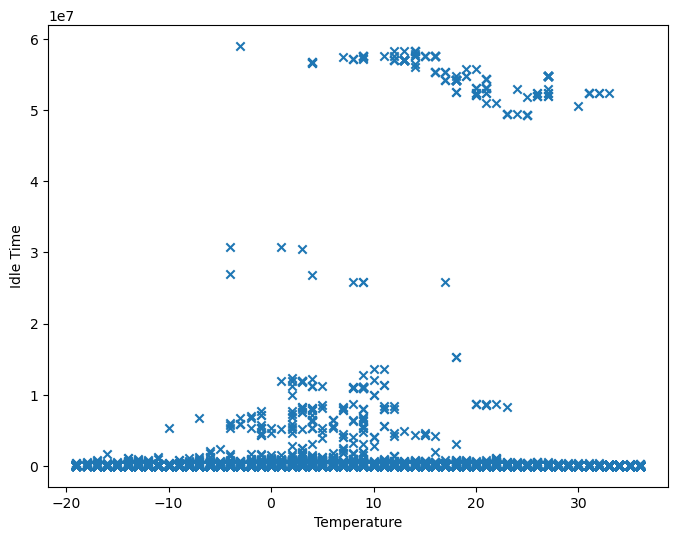

In [14]:
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Temperature")
plt.ylabel("Idle Time")
plt.show()

In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

def plot_tree_regression_line(tree_depth):

    # Fit regression model (to full data)
    Tree_reg = DecisionTreeRegressor(max_depth=tree_depth,criterion="squared_error")
    Tree_reg.fit(Xp.reshape((-1,1)), Yp) 
    
    attributes = Tree_reg.tree_

    # plot
    plt.figure(figsize = (8,6))
    plt.scatter(Xp, Yp, marker="x")
    plt.plot(np.arange(-18,40,1), Tree_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
    plt.xlabel("Temperature", fontsize=16)
    plt.ylabel("Idle Time", fontsize=16)
    
    print("number of nodes: ", attributes.node_count)
    print("number of leafs: ", attributes.n_leaves)
   
    return Tree_reg

number of nodes:  15
number of leafs:  8


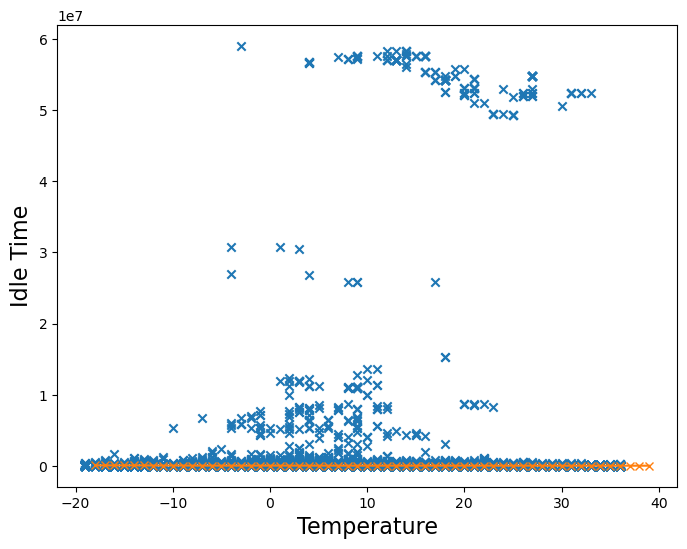

In [16]:
tree_reg = plot_tree_regression_line(3)

Split dataset into training and testing set (with sklearn)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Xp, Yp, test_size=0.2, random_state=100)

In [18]:
dtree = DecisionTreeRegressor(max_depth=3,criterion="squared_error")

Train decision tree

In [19]:
dtree.fit(X_train.reshape((-1, 1)), y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'T <= 18.5\nsquared_error = 159600867747.086\nsamples = 2465158\nvalue = 8229.251'),
 Text(0.25, 0.625, 'T <= -8.5\nsquared_error = 186846665041.735\nsamples = 1288140\nvalue = 10454.945'),
 Text(0.125, 0.375, 'T <= -12.5\nsquared_error = 4820954333.564\nsamples = 4951\nvalue = 31439.899'),
 Text(0.0625, 0.125, 'squared_error = 9987851687.148\nsamples = 1297\nvalue = 48867.463'),
 Text(0.1875, 0.125, 'squared_error = 2840873415.796\nsamples = 3654\nvalue = 25253.925'),
 Text(0.375, 0.375, 'T <= 13.5\nsquared_error = 187547279384.61\nsamples = 1283189\nvalue = 10373.978'),
 Text(0.3125, 0.125, 'squared_error = 156976003734.876\nsamples = 812853\nvalue = 11161.977'),
 Text(0.4375, 0.125, 'squared_error = 240378821276.719\nsamples = 470336\nvalue = 9012.127'),
 Text(0.75, 0.625, 'T <= 21.5\nsquared_error = 129771446350.171\nsamples = 1177018\nvalue = 5793.431'),
 Text(0.625, 0.375, 'T <= 19.5\nsquared_error = 168554796961.738\nsamples = 355080\nvalue = 7701.644'),
 Text(

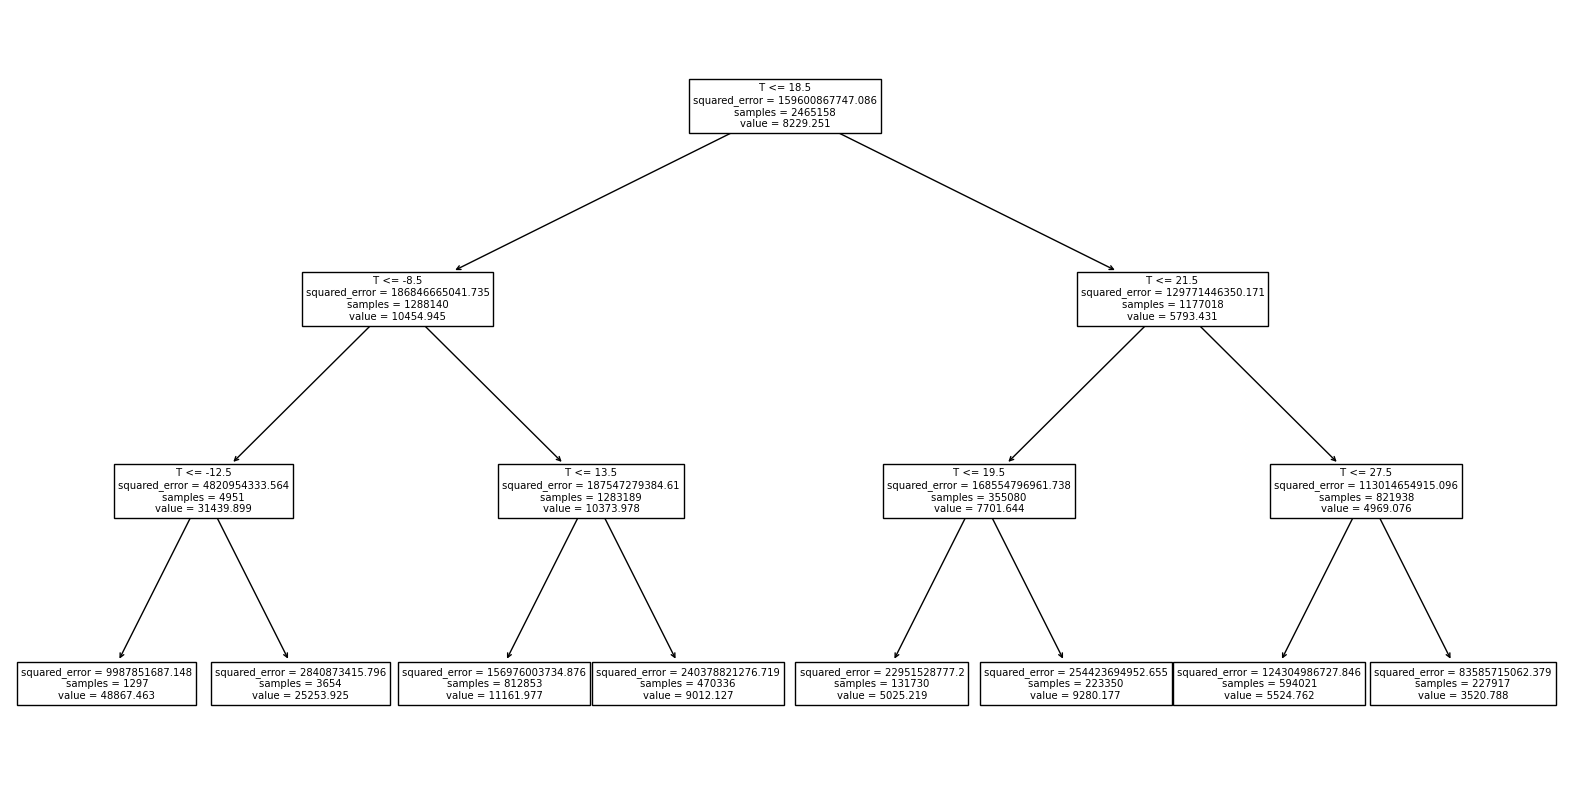

In [20]:
plt.figure(figsize = (20,10))
plot_tree(dtree, feature_names="Temperature", class_names='Idle Time')

Predict on test set

In [21]:
y_pred = dtree.predict(X_test.reshape((-1, 1)))

Evaluate model

In [22]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 149317720497.36603


[Text(0.5, 0.875, 'T <= 18.5\nsquared_error = 157545691526.279\nsamples = 3081448\nvalue = 8208.421'),
 Text(0.25, 0.625, 'T <= -8.5\nsquared_error = 185349411454.355\nsamples = 1609899\nvalue = 10461.552'),
 Text(0.125, 0.375, 'T <= -12.5\nsquared_error = 9220784485.212\nsamples = 6205\nvalue = 32419.233'),
 Text(0.0625, 0.125, 'squared_error = 9828950403.773\nsamples = 1639\nvalue = 48707.841'),
 Text(0.1875, 0.125, 'squared_error = 8873054138.755\nsamples = 4566\nvalue = 26572.314'),
 Text(0.375, 0.375, 'T <= 4.5\nsquared_error = 186029014220.07\nsamples = 1603694\nvalue = 10376.593'),
 Text(0.3125, 0.125, 'squared_error = 77498821089.733\nsamples = 364135\nvalue = 12528.711'),
 Text(0.4375, 0.125, 'squared_error = 217909271557.75\nsamples = 1239559\nvalue = 9744.383'),
 Text(0.75, 0.625, 'T <= 21.5\nsquared_error = 127116331100.505\nsamples = 1471549\nvalue = 5743.459'),
 Text(0.625, 0.375, 'T <= 19.5\nsquared_error = 161418873211.783\nsamples = 444301\nvalue = 7597.274'),
 Text(0.

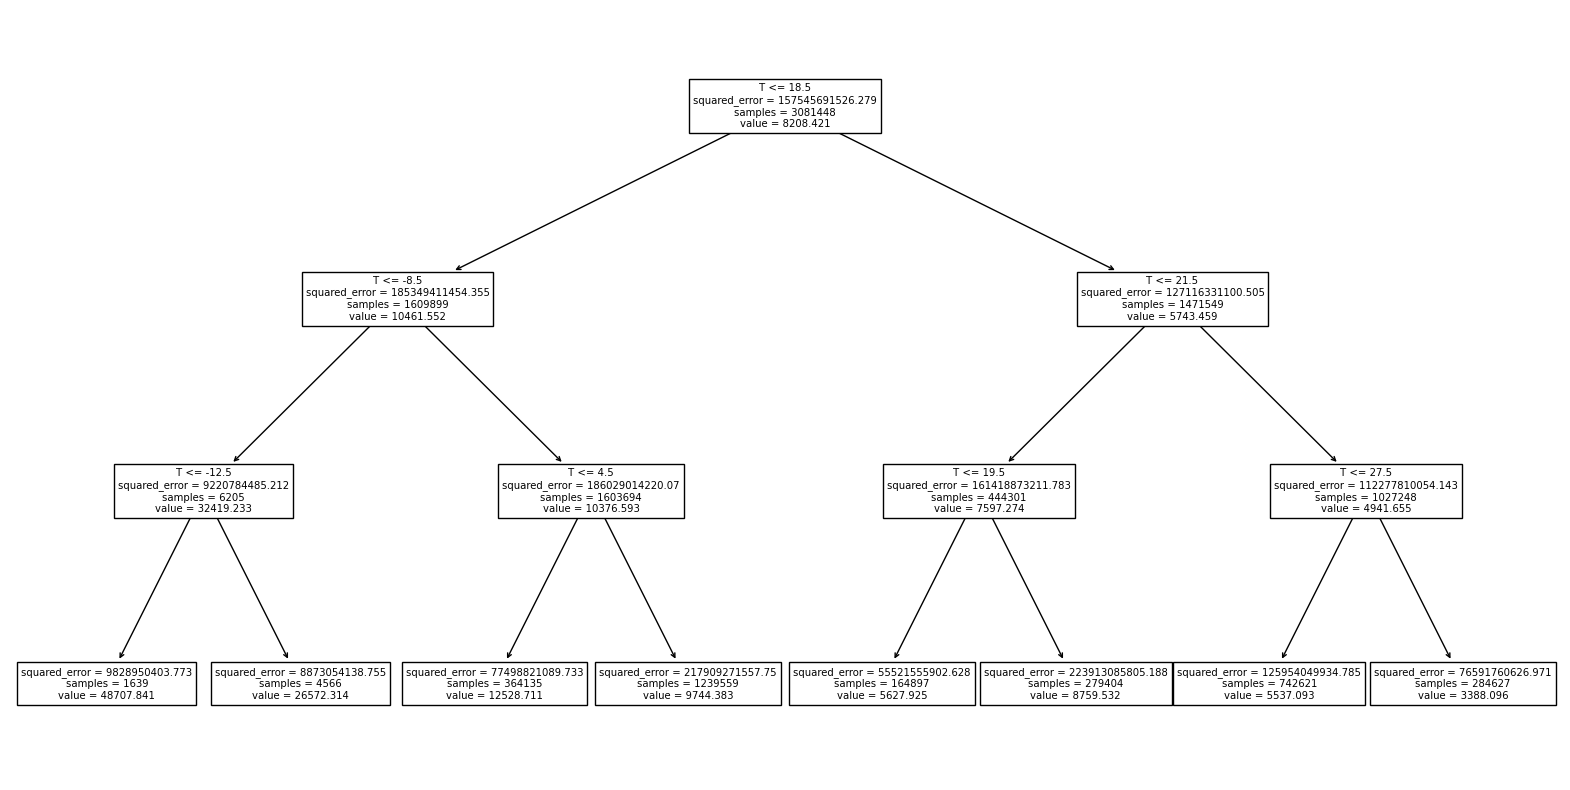

In [23]:
plt.figure(figsize = (20,10))
plot_tree(tree_reg, feature_names='Temperature', class_names='Idle Time')

## Irrelevant tries

Split dataset into training and testing set (with sklearn)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xp, Y, random_state=0)

NameError: name 'X' is not defined

Determining effective alphas

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=0, criterion="gini")

In [ ]:
path = tree_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

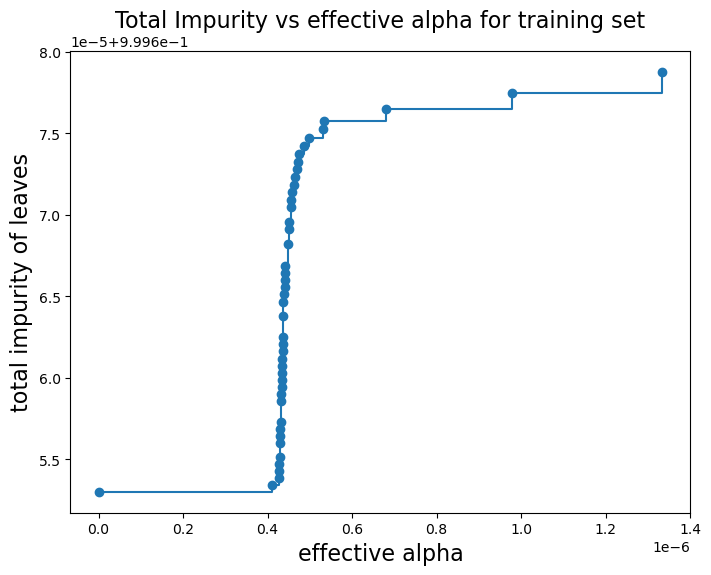

In [ ]:
#plot cost_complexity_pruning_path
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")  # we remove the last alpha as this corresponds to a tree with only the root node
ax.set_xlabel("effective alpha",fontsize=16)
ax.set_ylabel("total impurity of leaves",fontsize=16)
ax.set_title("Total Impurity vs effective alpha for training set",fontsize=16)

Train decision tree

In [ ]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

Plot decision tree

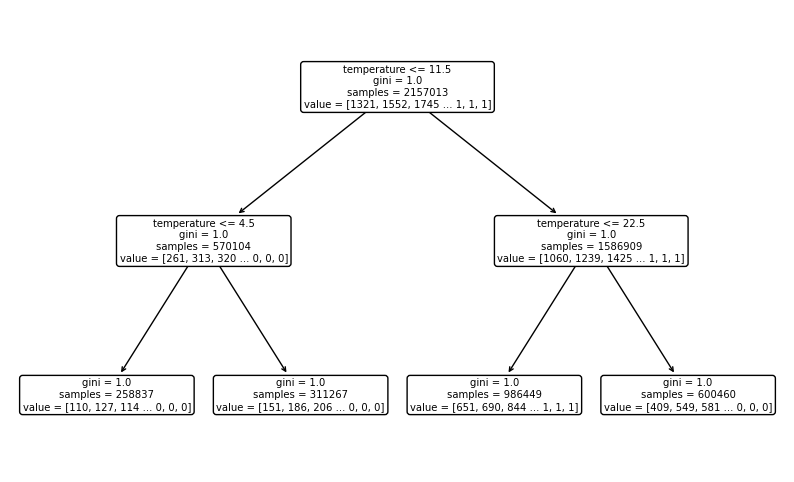

In [ ]:
plt.figure(figsize=(15, 6))
tree.plot_tree(dtree, feature_names=["temperature"], filled=True, rounded=True)
plt.show()

In [ ]:
def plot_regression_surface(tree_depth):
    # Import necessary libraries
    from sklearn.tree import DecisionTreeRegressor
    import numpy as np
    import matplotlib.pyplot as plt

    # Assign the target variable values to Y
    Y = merged_weather_idle_time_station['idle_time'].values

    # Convert Y to float if needed
    Y = Y.astype('float64')

    # Create and fit the decision tree regressor
    model = DecisionTreeRegressor(max_depth=tree_depth)
    model.fit(X, Y)

    # Define range per feature
    x_range = [min(X), max(X)]
    y_range = [min(Y), max(Y)]
    plt.figure(figsize=(8, 6))

    # Generate meshgrid for plotting
    grid = 1000
    xx = np.linspace(x_range[0], x_range[1], grid).reshape(-1, 1)
    yy = model.predict(xx)

    # Plot the regression surface
    plt.plot(xx, yy, color='blue')
    
    # Plot data points
    plt.scatter(X, Y, marker='x', color='red')
    
    plt.xlabel("Temperature", fontsize=16)
    plt.ylabel("Idle Time", fontsize=16)
    plt.title(f"Decision Surface (Tree Depth: {tree_depth})", fontsize=16)
    plt.legend(['Regression Surface', 'Data Points'], fontsize=12)
    
    plt.show()


c:\Users\angel\miniconda3\envs\DSML_2023\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


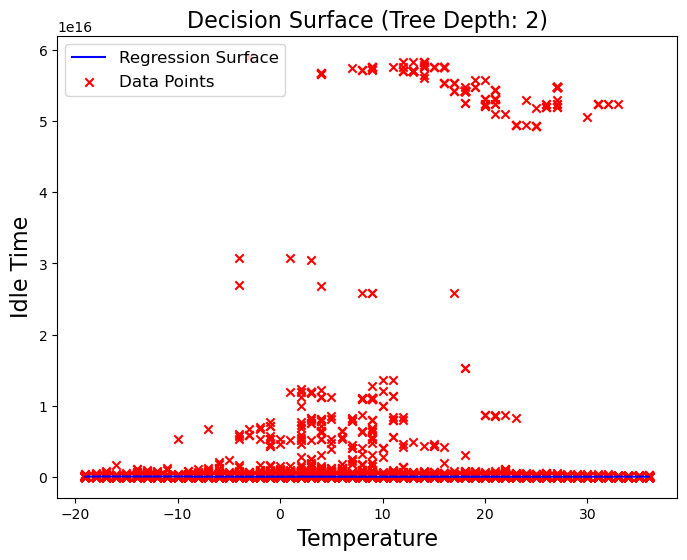

In [ ]:
plot_regression_surface(2)

Predict the model

In [ ]:
# memory problems
num_batches = 10
test_batches = np.array_split(X_test, num_batches)

In [ ]:
predictions = []
for batch in test_batches:
    batch_predictions = dtree.predict(batch)  # Perform prediction on the batch
    predictions.extend(batch_predictions)
predictions = np.array(predictions)

MemoryError: Unable to allocate 46.5 GiB for an array with shape (92444, 1, 67522) and data type float64

## Prediction of idle time based on station location feature (single tree)

Define X and Y variables

In [25]:
# independent variables
Xp = bluebikes_station_location_feature[['city_center_distance', 'boston_university_distance',
       'fenway_park_distance', 'harvard_university_distance', 'mit_distance',
       'boston_common_distance', 'boston_public_garden_distance',
       'newbury_street_distance', 'south_station_distance',
       'north_station_distance', 'back_bay_station_distance']]
# dependent variables
Yp = bluebikes_station_location_feature["idle_time_hours"]

Split dataset into training and testing set (with sklearn)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Xp, Yp, test_size=0.2, random_state=100)

In [27]:
dtree = DecisionTreeRegressor()
dtree_limited = DecisionTreeRegressor(max_depth=3, criterion="squared_error")

Train decision tree

In [28]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
dtree_limited.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.314470150996264, 0.9736842105263158, 'newbury_street_distance <= 2.858\nsquared_error = 1.568\nsamples = 2332318\nvalue = 0.702'),
 Text(0.1225093399750934, 0.9210526315789473, 'mit_distance <= 0.824\nsquared_error = 1.033\nsamples = 1659960\nvalue = 0.545'),
 Text(0.021585720215857203, 0.868421052631579, 'newbury_street_distance <= 1.545\nsquared_error = 0.423\nsamples = 324644\nvalue = 0.333'),
 Text(0.009962640099626401, 0.8157894736842105, 'north_station_distance <= 2.646\nsquared_error = 0.224\nsamples = 204240\nvalue = 0.262'),
 Text(0.006641760066417601, 0.7631578947368421, 'city_center_distance <= 2.298\nsquared_error = 0.288\nsamples = 127056\nvalue = 0.312'),
 Text(0.0033208800332088003, 0.7105263157894737, 'squared_error = 0.305\nsamples = 41808\nvalue = 0.292'),
 Text(0.009962640099626401, 0.7105263157894737, 'north_station_distance <= 2.39\nsquared_error = 0.279\nsamples = 85248\nvalue = 0.322'),
 Text(0.006641760066417601, 0.6578947368421053, 'squared_error = 0.33

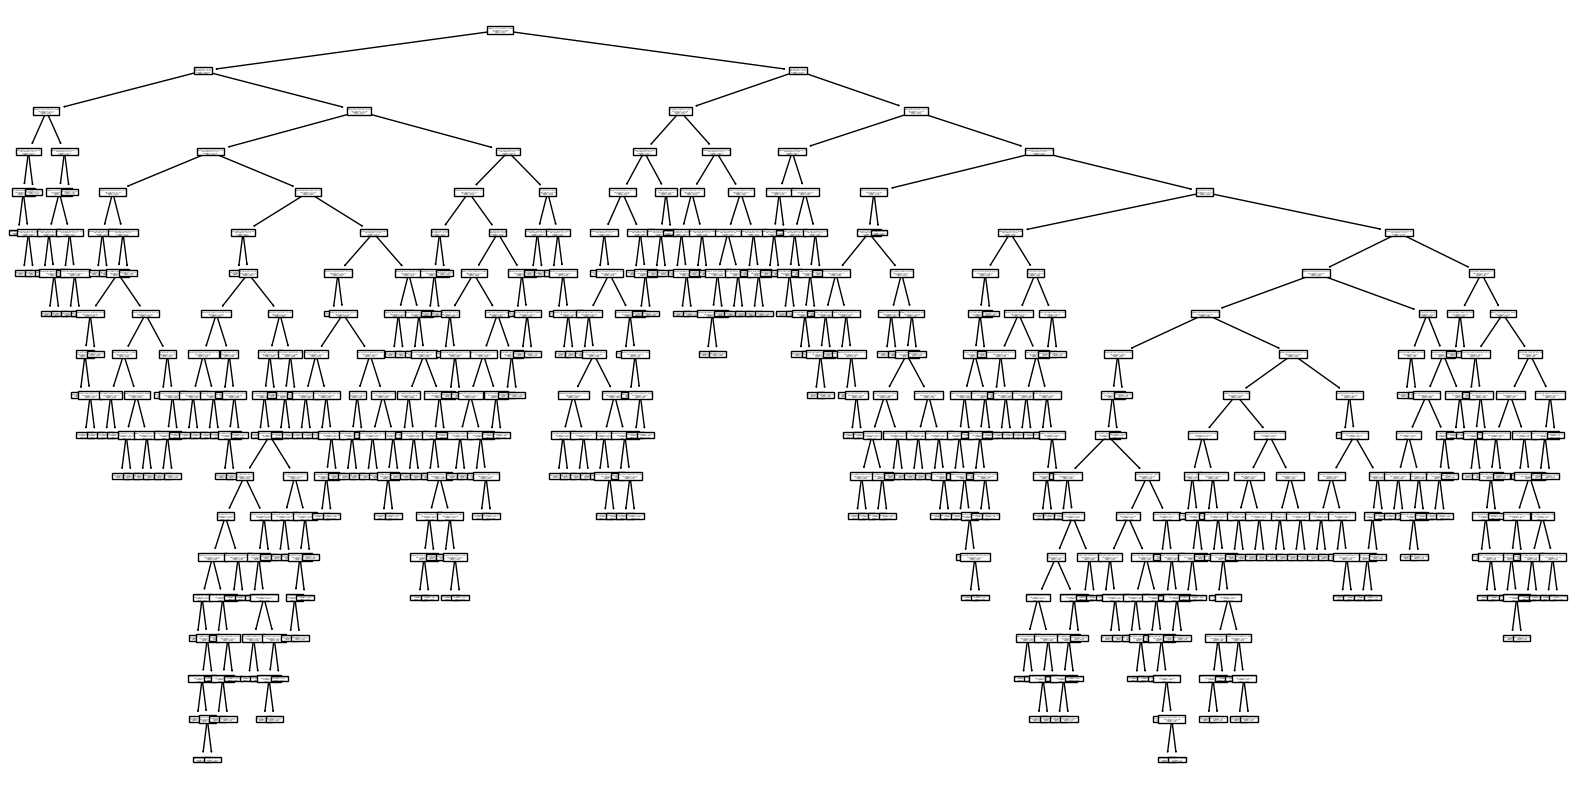

In [ ]:
plt.figure(figsize = (20,10))
plot_tree(dtree, feature_names=['city_center_distance', 'boston_university_distance',
       'fenway_park_distance', 'harvard_university_distance', 'mit_distance',
       'boston_common_distance', 'boston_public_garden_distance',
       'newbury_street_distance', 'south_station_distance',
       'north_station_distance', 'back_bay_station_distance'], class_names='Idle Time')

[Text(0.5, 0.875, 'newbury_street_distance <= 2.858\nsquared_error = 1.567\nsamples = 2332318\nvalue = 0.702'),
 Text(0.25, 0.625, 'mit_distance <= 0.824\nsquared_error = 1.033\nsamples = 1659127\nvalue = 0.545'),
 Text(0.125, 0.375, 'newbury_street_distance <= 1.545\nsquared_error = 0.419\nsamples = 324216\nvalue = 0.333'),
 Text(0.0625, 0.125, 'squared_error = 0.225\nsamples = 203857\nvalue = 0.262'),
 Text(0.1875, 0.125, 'squared_error = 0.726\nsamples = 120359\nvalue = 0.454'),
 Text(0.375, 0.375, 'north_station_distance <= 3.844\nsquared_error = 1.168\nsamples = 1334911\nvalue = 0.596'),
 Text(0.3125, 0.125, 'squared_error = 1.082\nsamples = 1152114\nvalue = 0.56'),
 Text(0.4375, 0.125, 'squared_error = 1.652\nsamples = 182797\nvalue = 0.827'),
 Text(0.75, 0.625, 'mit_distance <= 3.121\nsquared_error = 2.673\nsamples = 673191\nvalue = 1.089'),
 Text(0.625, 0.375, 'city_center_distance <= 4.833\nsquared_error = 1.885\nsamples = 323064\nvalue = 0.82'),
 Text(0.5625, 0.125, 'squared_

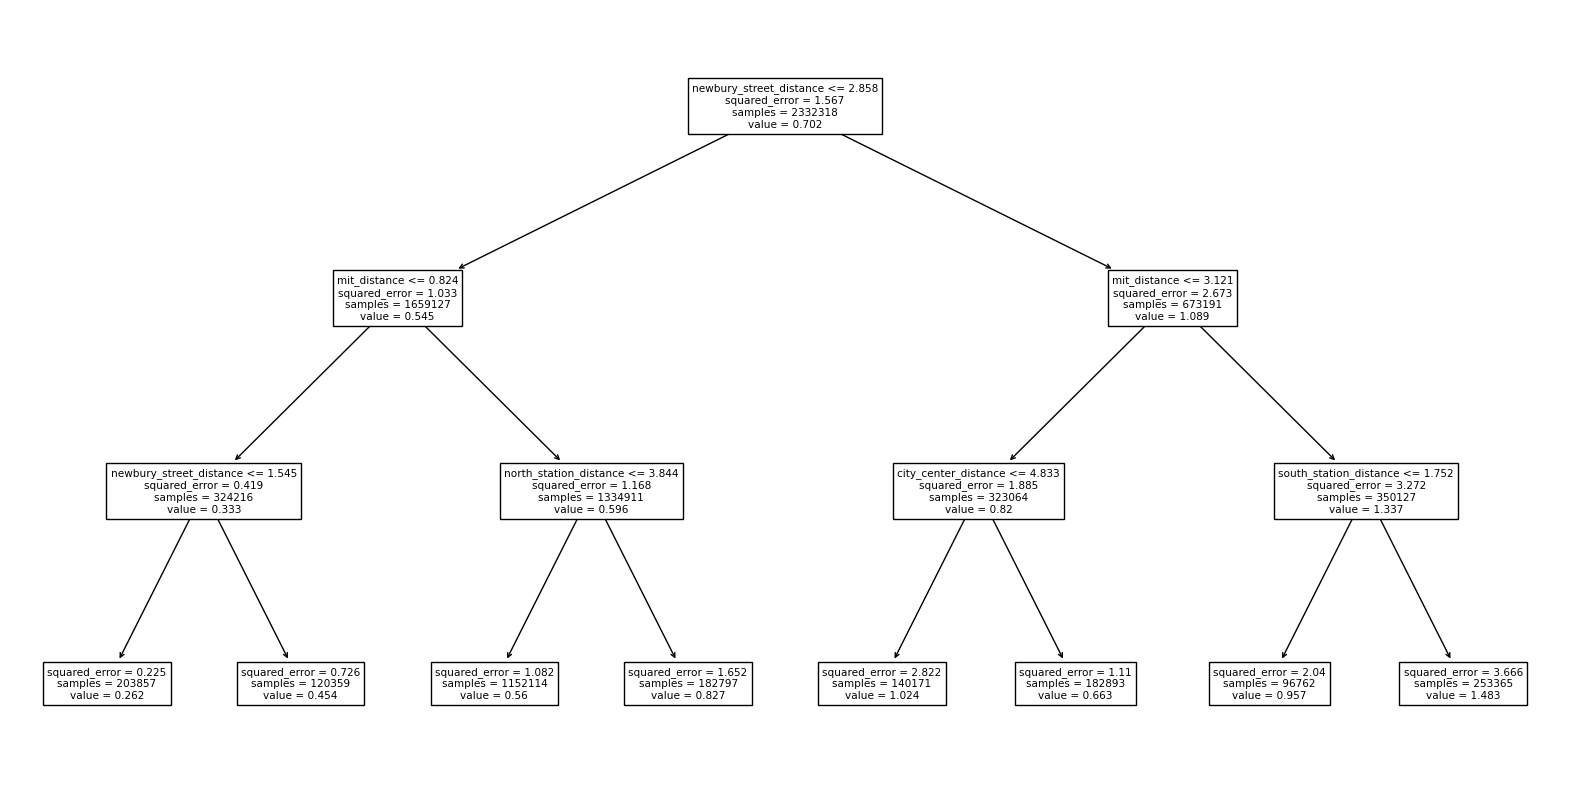

In [30]:
plt.figure(figsize = (20,10))
plot_tree(dtree_limited, feature_names=['city_center_distance', 'boston_university_distance',
       'fenway_park_distance', 'harvard_university_distance', 'mit_distance',
       'boston_common_distance', 'boston_public_garden_distance',
       'newbury_street_distance', 'south_station_distance',
       'north_station_distance', 'back_bay_station_distance'], class_names='Idle Time')

Predict on test set

In [31]:
y_pred = dtree.predict(X_test)
y_pred_limited = dtree_limited.predict(X_test)

Evaluate model

In [32]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3847314955342451


In [33]:
mse = mean_squared_error(y_test, y_pred_limited)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4611675221523357


## Prediction of idle time based on station location feature (all trees)

### 1. Idle Time and Mit distance

Define X and Y variables

In [34]:
# independent variables
Xp = bluebikes_station_location_feature["mit_distance"].values
# dependent variables
Yp = bluebikes_station_location_feature["idle_time_hours"].values

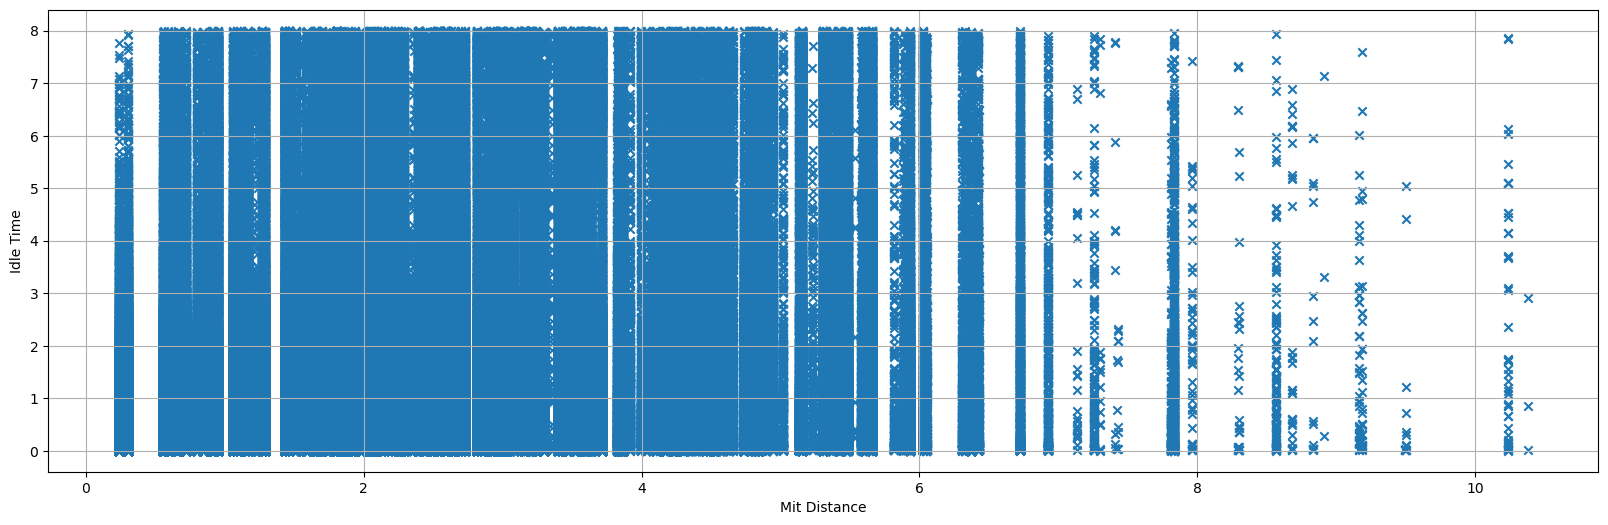

In [35]:
plt.figure(figsize = (20,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Mit Distance")
plt.ylabel("Idle Time")
plt.grid()
plt.show()

number of nodes:  15
number of leafs:  8


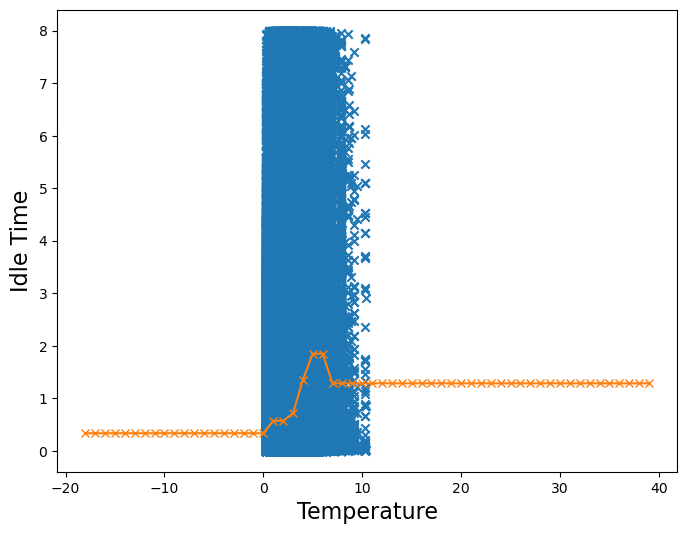

In [36]:
tree_reg = plot_tree_regression_line(3)

Split dataset into training and testing set (with sklearn)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Xp, Yp, test_size=0.2, random_state=100)

In [38]:
dtree = DecisionTreeRegressor(max_depth=3,criterion="squared_error")

Train decision tree

In [39]:
dtree.fit(X_train.reshape((-1, 1)), y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'm <= 3.889\nsquared_error = 1.567\nsamples = 2332318\nvalue = 0.702'),
 Text(0.25, 0.625, 'm <= 2.008\nsquared_error = 1.308\nsamples = 2103996\nvalue = 0.623'),
 Text(0.125, 0.375, 'm <= 0.824\nsquared_error = 0.949\nsamples = 1054349\nvalue = 0.497'),
 Text(0.0625, 0.125, 'squared_error = 0.419\nsamples = 324216\nvalue = 0.333'),
 Text(0.1875, 0.125, 'squared_error = 1.167\nsamples = 730133\nvalue = 0.57'),
 Text(0.375, 0.375, 'm <= 3.329\nsquared_error = 1.636\nsamples = 1049647\nvalue = 0.75'),
 Text(0.3125, 0.125, 'squared_error = 1.518\nsamples = 854803\nvalue = 0.713'),
 Text(0.4375, 0.125, 'squared_error = 2.119\nsamples = 194844\nvalue = 0.916'),
 Text(0.75, 0.625, 'm <= 4.86\nsquared_error = 3.374\nsamples = 228322\nvalue = 1.427'),
 Text(0.625, 0.375, 'm <= 4.697\nsquared_error = 2.946\nsamples = 156184\nvalue = 1.27'),
 Text(0.5625, 0.125, 'squared_error = 3.072\nsamples = 113255\nvalue = 1.354'),
 Text(0.6875, 0.125, 'squared_error = 2.544\nsamples = 429

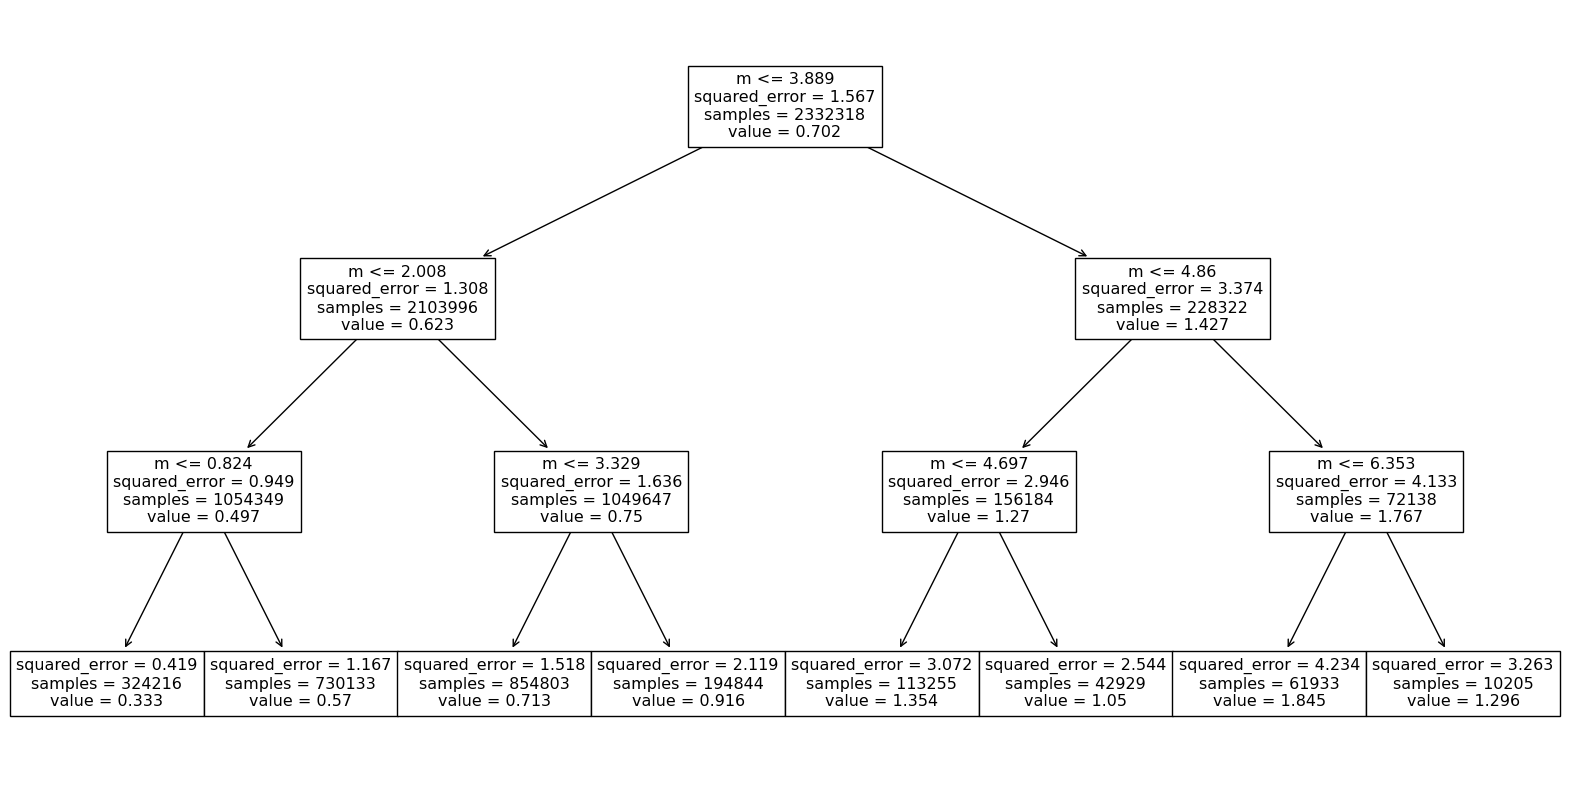

In [40]:
plt.figure(figsize = (20,10))
plot_tree(dtree, feature_names="mit_distance", class_names='Idle Time')

Predict on test set

In [41]:
y_pred = dtree.predict(X_test.reshape((-1, 1)))

Evaluate model

In [42]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.480669418600662


### 2. Idle Time and City Center distance

Define X and Y variables

In [43]:
# independent variables
Xp = bluebikes_station_location_feature["city_center_distance"].values
# dependent variables
Yp = bluebikes_station_location_feature["idle_time_hours"].values

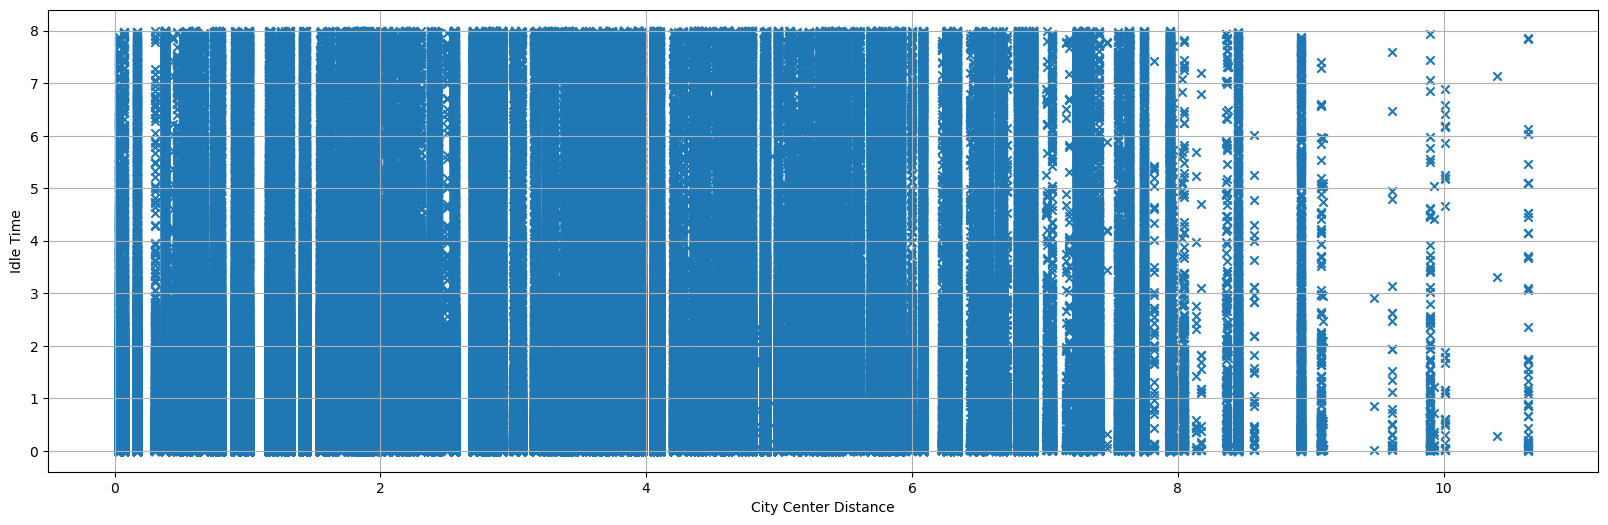

In [44]:
plt.figure(figsize = (20,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("City Center Distance")
plt.ylabel("Idle Time")
plt.grid()
plt.show()

number of nodes:  15
number of leafs:  8


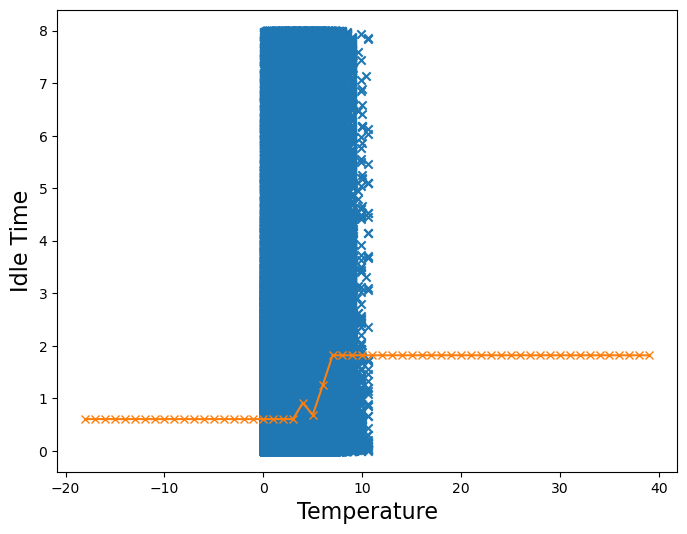

In [45]:
tree_reg = plot_tree_regression_line(3)

Split dataset into training and testing set (with sklearn)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Xp, Yp, test_size=0.2, random_state=100)

In [47]:
dtree = DecisionTreeRegressor(max_depth=3,criterion="squared_error")

Train decision tree

In [48]:
dtree.fit(X_train.reshape((-1, 1)), y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'c <= 5.388\nsquared_error = 1.567\nsamples = 2332318\nvalue = 0.702'),
 Text(0.25, 0.625, 'c <= 3.759\nsquared_error = 1.355\nsamples = 2120351\nvalue = 0.641'),
 Text(0.125, 0.375, 'c <= 3.68\nsquared_error = 1.214\nsamples = 1664801\nvalue = 0.591'),
 Text(0.0625, 0.125, 'squared_error = 1.241\nsamples = 1567447\nvalue = 0.603'),
 Text(0.1875, 0.125, 'squared_error = 0.739\nsamples = 97354\nvalue = 0.398'),
 Text(0.375, 0.375, 'c <= 4.786\nsquared_error = 1.825\nsamples = 455550\nvalue = 0.827'),
 Text(0.3125, 0.125, 'squared_error = 2.162\nsamples = 288925\nvalue = 0.913'),
 Text(0.4375, 0.125, 'squared_error = 1.204\nsamples = 166625\nvalue = 0.678'),
 Text(0.75, 0.625, 'c <= 6.802\nsquared_error = 3.284\nsamples = 211967\nvalue = 1.31'),
 Text(0.625, 0.375, 'c <= 6.671\nsquared_error = 2.902\nsamples = 167056\nvalue = 1.17'),
 Text(0.5625, 0.125, 'squared_error = 3.124\nsamples = 143930\nvalue = 1.242'),
 Text(0.6875, 0.125, 'squared_error = 1.283\nsamples = 231

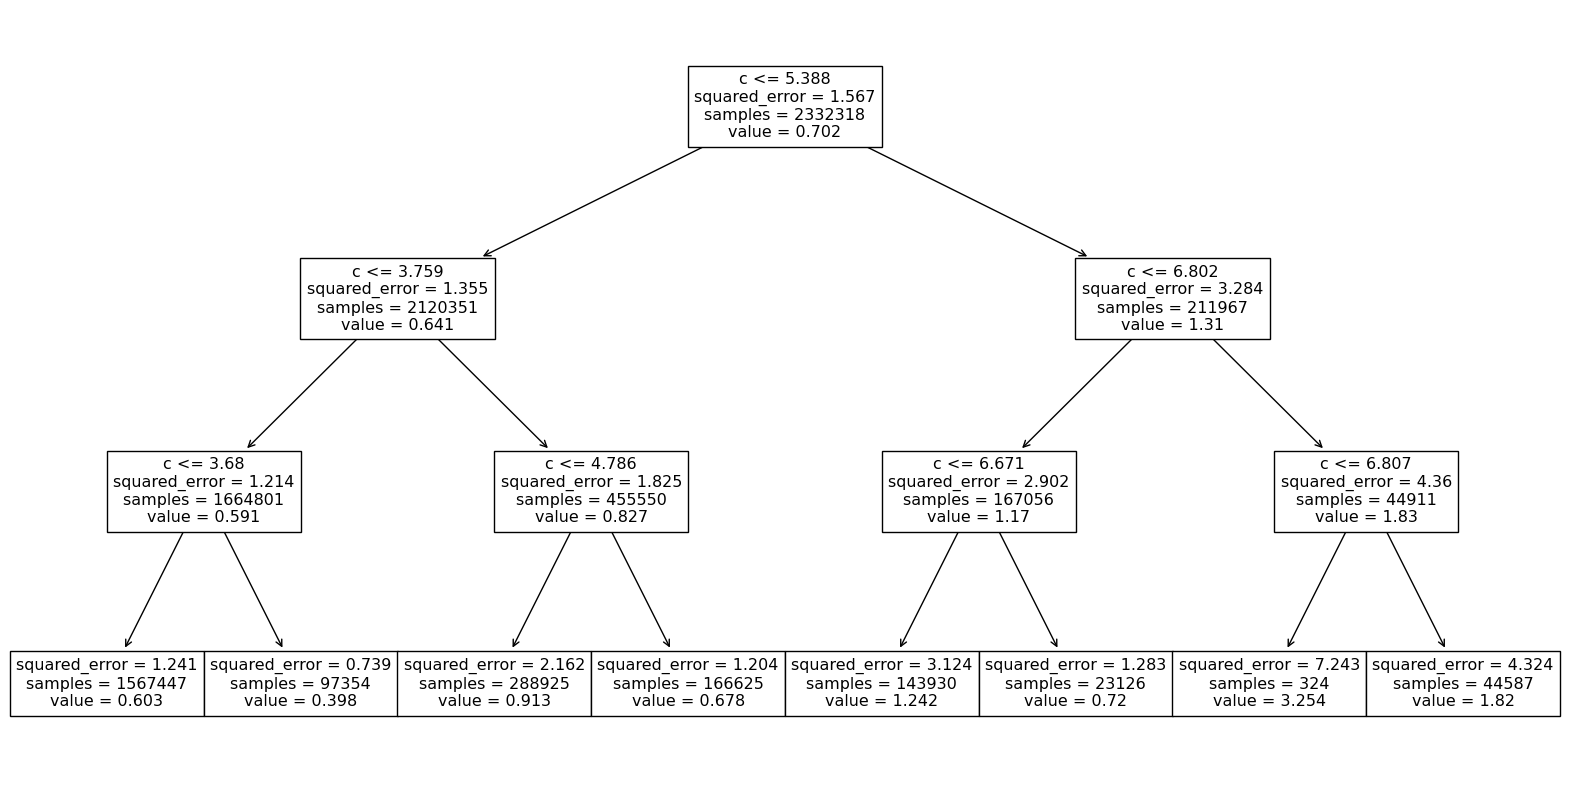

In [49]:
plt.figure(figsize = (20,10))
plot_tree(dtree, feature_names="city_center_distance", class_names='Idle Time')

Predict on test set

In [50]:
y_pred = dtree.predict(X_test.reshape((-1, 1)))

Evaluate model

In [51]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5110333264806914
